#### If you are working on a new environmnet, you might want to run the following cell to make sure that the MIDIUtil library has been installed 

In [ ]:
!pip install midiutil

#### Import the variables and definitions from the accompanying music_def.py file 

In [18]:
# This file contains all the definitions for the widgets and some constant variables that I had set

from music_def import *

***

### Define your key, scale, and octave

In [19]:
# First choice with regards to music

# Run this cell to get the widgets to show
display(vert_note)
display(vert_scale)
display(vert_octave)

In [28]:
# Processing inputs from cell above

note_index = notes_to_index[def_note.value]
scale_num = scale_index[def_scale.value]
scale_clean = all_scales[scale_num]

# Printing outputs to allow user to check whether they are happy with their choices

print(
    "--------------------------------------------------------------------------------------------------------------------------"
)

print(
    "You have chosen the Key,",
    def_note.value,
    "which corresponds to the index: \n",
    note_index,
)
print(
    "The chosen scale is a ",
    def_scale.value,
    "which corresponds to the midi indices: \n",
    scale_clean,
)
print("The octave that you have chose to map your notes onto is: \n ", def_octave.value)

print(
    "If this is incorrect, please check with the drop down menu above and run this cell again."
)

# Mapping chosen scale onto each other
scale = []
for ix in scale_clean:
    a = ix + (len_oct * def_octave.value) + note_index
    scale.append(a)

print(
    "--------------------------------------------------------------------------------------------------------------------------"
)

--------------------------------------------------------------------------------------------------------------------------
You have chosen the Key, C which corresponds to the index: 
 0
The chosen scale is a  minor-harmonic which corresponds to the midi indices: 
 (0, 2, 3, 5, 7, 8, 11, 12)
The octave that you have chose to map your notes onto is: 
  4
If this is incorrect, please check with the drop down menu above and run this cell again.
--------------------------------------------------------------------------------------------------------------------------


#### Other data types

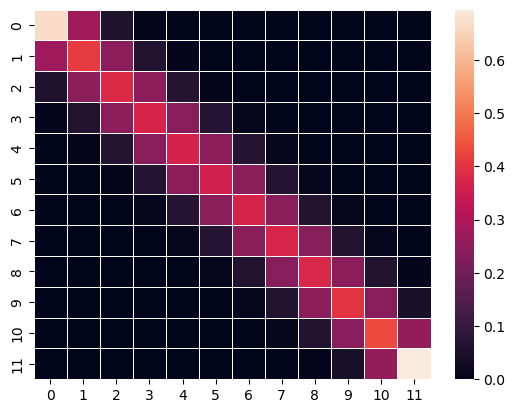

In [36]:
# heatmap (?) data
import seaborn as sns

file = np.loadtxt("sample_data/bound_matrix.csv", delimiter=" ")
data = file

# First look at the data. We can visualise this using seaborn.
sns.heatmap(data, linewidth=0.5)
plt.show()

In [ ]:
# There are different ways to do this - either we can treat each row sequentially and flatten the array:
flat_data = np.reshape(data, -1)

# and then assign bins as before for the 2D data
bins = np.linspace(
    min(flat_data), max(flat_data), len(scale)
)  # Defining bins based of the max, min, and length of a scale
# sorting the data into the bins defined above
abs_binned = np.digitize(flat_data, bins)
unique_bins = np.unique(abs_binned)  # making an array of our unique bins

# split the scale based on how many unique bins there are
revalue = dict(
    zip(unique_bins, scale[:: int(len(scale) / len(unique_bins))])
)  # dictionary to map our scale to the binned values of our IR absorption
notes = [
    revalue.get(n, n) for n in abs_binned
]  # mapping the data values onto the scale

In [ ]:
# alternatively, each row entry gets one track
notes_list = []
for d in data:

    # and then assign bins as before for the 2D data
    bins = np.linspace(
        min(flat_data), max(flat_data), len(scale)
    )  # Defining bins based of the max, min, and length of a scale
    # sorting the data into the bins defined above
    abs_binned = np.digitize(d, bins)
    unique_bins = np.unique(abs_binned)  # making an array of our unique bins

    # split the scale based on how many unique bins there are
    revalue = dict(
        zip(unique_bins, scale[:: int(len(scale) / len(unique_bins))])
    )  # dictionary to map our scale to the binned values of our IR absorption
    notes = [
        revalue.get(n, n) for n in abs_binned
    ]  # mapping the data values onto the scale
    notes_list.append(notes)

num_tracks = len(data)

In [49]:
int(len(scale) / len(unique_bins))

2

****

### Definine rest of parameters for MIDIUtil to work

#### If you are confused on the choices please visit the MIDIUtil Docs, a link to it can be found on the learn page. 

In [24]:
# Displaying the pre-defined widgets to help with musical choice for writing your MIDI file

display(vert_channel)
display(vert_tempo)
display(vert_volume)
print("About time signature")
display(vert_bpb)
display(vert_type_beat)

About time signature


In [26]:
# Set up some variables for the MIDIUtil program to work

# This takes your inputs from above and converts it into a format that the MIDIUtil library can read

channel = int(def_channel.value)
tempo = int(def_tempo.value)
volume = int(def_volume.value)

# Final inputs for wirting the MIDI file

display(vert_name)
display(vert_int)

We can write the data into a new track for each row, so it will appear as different tracks in the music program, or alternatively we can write them all into one track with multiple notes.

Different tracks:

In [ ]:
# Writing a MIDI for seperate tracks

MyMIDI = MIDIFile(numTracks=num_tracks)

for track, notes in zip(range(0, num_tracks, 1), notes_list):
    MyMIDI.addTempo(track, time, tempo)
    MyMIDI.addTimeSignature(
        track,
        time,
        def_bpb.value,
        note_name_dictionary[def_type_beat.value],
        clocks_per_tick,
        notes_per_quarter,
    )  # add a time signature, here just 4/4

    # loop over each time step

    i = 0
    for n in notes[::4]:  # loop over each note
        MyMIDI.addNote(track, channel, n, time + i, duration, volume)
        i = i + 1

    # saving the resulting midi file.

with open(str(def_name.value) + ".mid", "wb") as output_file:
    MyMIDI.writeFile(output_file)

Same track:

In [31]:
# Writing a MIDI file with all the different notes in one shared track

# One track, defaults to format 1 (tempo track is created automatically)
MyMIDI = MIDIFile(numTracks=1)

MyMIDI.addTempo(track, time, tempo)
# add a time signature, here just 4/4
MyMIDI.addTimeSignature(
    track,
    time,
    def_bpb.value,
    note_name_dictionary[def_type_beat.value],
    clocks_per_tick,
    notes_per_quarter,
)

# loop over each of the notes in the noteslist
# loop over each time step
for notes in notes_list:
    i = 0
    for n in notes[::1]:  # loop over each note
        MyMIDI.addNote(track, channel, n, time + i, duration, volume)
        i = i + 1

    # saving the resulting midi file.

with open(str(def_name.value) + ".mid", "wb") as output_file:
    MyMIDI.writeFile(output_file)